In [269]:
!pip install names
!pip install random-username
!pip install random-password-generator

In [1]:
import names
from random_username.generate import generate_username
from password_generator import PasswordGenerator
import random
import csv

In [2]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

import numpy as np

In [3]:
def n_rand_digits(n):
    return str(random.randint(1, 9)) + ''.join(["{}".format(random.randint(0, 9)) for num in range(0, n - 1)]) #firt digit isn't 0

def withProbabilityOf(probability):
    return random.random() < probability

def generate_date(startYear, endYear):
    yyyy = random.randint(startYear, endYear)
    mm = random.randint(1,12)
    dd = None
    isLeap = yyyy % 4 == 0 and (yyyy % 100 != 0 or yyyy % 400 == 0)
    if (mm == 1 or mm == 3 or mm == 5 or mm == 7 or mm == 8 or mm == 10 or mm == 12):
        dd = random.randint(1,31)
    elif (mm == 4 or mm == 6 or mm == 9 or mm == 11):
        dd = random.randint(1,30)
    else:
        if(isLeap):
            dd = random.randint(1,29)
        else:
            dd = random.randint(1,28)
    return "{}-{}-{}".format(yyyy,mm,dd)

def generate_currency():
    currency = ''
    if (withProbabilityOf(0.8)):
        currency = 'RUB'
    else:
        switch = random.randint(0, 3)
        if(switch == 0):
            currency = 'JPY'
        elif(switch == 1):
            currency = 'USD'
        elif(switch == 2):
            currency = 'EUR'
        else:
            currency = 'CNY'
    return currency

pwo = PasswordGenerator()
# All properties are optional
pwo.minlen = 10
pwo.maxlen = 30
#pwo.minuchars = 2
pwo.minlchars = 10
#pwo.minnumbers = 1
#pwo.minschars = 1 

In [19]:
def generate_workers(n):
    data = ""
    for i in range(0, n):
        passport = n_rand_digits(10) #PassportNumber
        name = names.get_full_name() #FullName
        bd = generate_date(1940, 2001) #BirthDate
        tax = n_rand_digits(12) #TaxId
        login = generate_username(1)[0]+str(random.randint(0, 99)) #Login
        password = pwo.generate() #Password
        data += "EXEC Add_Worker '{}', '{}', '{}', '{}', '{}', '{}';".format(passport,name,bd,tax,login,password) + "\n"
    return data

def generate_clients(n):
    data = ""
    for i in range(0, n):
        passport = n_rand_digits(10) #PassportNumber
        name = names.get_full_name() #FullName
        bd = generate_date(1940, 2005) #BirthDate
        creatorId = random.randint(1, 100) #AccountCreatorId, the second number here is amount of workers (we pick one of their ids)
        tax = "NULL" #TaxId
        phone = "NULL" #PhoneNumber
        income = "NULL" #IncomePerMonth
        if (withProbabilityOf(0.9)):
            phone = "89" + n_rand_digits(9)
        if (withProbabilityOf(0.4)):
            tax = n_rand_digits(12)
            income = random.randint(10, 200) * 1000 
        data += "EXEC Add_Client '{}', '{}', '{}', '{}', {}, {}, {};".format(passport,name,bd,creatorId,tax,phone,income) + "\n"
    return data

def generate_deposit_serviceId(currency):
    serviceId = 1
    isHighInterest = True
    if(withProbabilityOf(0.1)):
        isHighInterest = False
        serviceId = 2
    if (currency == 'JPY'):
        serviceId += 2
    elif (currency == 'USD'):
        serviceId += 4
    elif (currency == 'EUR'):
        serviceId += 6
    elif (currency == 'CNY'):
        serviceId += 8
    return serviceId

def generate_deposit_total():
    #normal
    thisLoc = 50000
    thisScale = 100000
    if(withProbabilityOf(0.2)):
        #rich
        thisLoc = 500000
        thisScale = 1000000
    if(withProbabilityOf(0.2)):
        #poor
        thisLoc = 5000
        thisScale = 10000
    total = np.random.normal(loc = thisLoc, scale = thisScale)
    if (total < 0):
        total *= -1
    return total if total % 100 == 0 else total + 100 - total % 100 #round up to nearest hundred

def generate_loan_total(serviceId, mortageMultiplier):
    thisLoc = 0
    thisScale = 0
    rate = 0
    if(serviceId == 11):
        rate = 1
        thisLoc = 100000 * rate/4
        thisScale = thisLoc
    elif(serviceId == 12):
        rate = 1
        thisLoc = 100000*mortageMultiplier*rate/2
        thisScale = thisLoc/4
    elif(serviceId == 13):
        rate = 1.37
        thisLoc = 100000 * rate/4
        thisScale = thisLoc
    elif(serviceId == 14):
        rate = 1.37
        thisLoc = 100000*mortageMultiplier*rate/4
        thisScale = thisLoc
    elif(serviceId == 15):
        rate = 0.013
        thisLoc = 100000 * rate/4
        thisScale = thisLoc
    elif(serviceId == 16):
        rate = 0.013
        thisLoc = 100000*mortageMultiplier*rate/4
        thisScale = thisLoc
    elif(serviceId == 17):
        rate = 0.011
        thisLoc = 100000 * rate/4
        thisScale = thisLoc
    elif(serviceId == 18):
        rate = 0.011
        thisLoc = 100000*mortageMultiplier*rate/4
        thisScale = thisLoc
    elif(serviceId == 19):
        rate = 0.086
        thisLoc = 100000 * rate/4
        thisScale = thisLoc
    elif(serviceId == 20):
        rate = 0.086
        thisLoc = 100000*mortageMultiplier*rate/4
        thisScale = thisLoc
    total = np.random.normal(loc = thisLoc, scale = thisScale)
    if (total < 0):
        total *= -1
    return total if total % 1000 == 0 else total + 1000 - total % 1000 #round up to nearest thousand

In [286]:
import time
start_time = time.time()

f = open("10kClientsFor100Workers.sql", "w")
f.write(generate_clients(10000))
f.close()

print("--- %s seconds ---" % (time.time() - start_time))

--- 68.75600695610046 seconds ---


In [288]:
 print(generate_clients(1))

EXEC Add_Client '7554418459', 'Patricia Weir', '1990-6-1', '1', 403752527764, 89111640240, 28000;



In [6]:
from scipy.stats import lognorm
s = 0.8 # var = 0.64 expected value = 6.27
mean, var, skew, kurt = lognorm.stats(s = 0.2, moments='mvsk')
print("Mean: {}\nVar: {}\nSkew: {}\nKurt: {}".format(mean, var, skew, kurt))



Mean: 1.0202013400267558
Var: 0.04247629348257031
Skew: 0.6142947619866632
Kurt: 0.6783657771754372


[0, 5494, 3017, 924, 339, 121, 58, 24, 14, 3, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
EXEC Add_BankAccount '1', '134000.0', '1', '90';
EXEC Add_BankAccount '1', '69200.0', '1', '83';
EXEC Add_BankAccount '1', '32100.0', '2', '14';
EXEC Add_BankAccount '1', '109600.0', '3', '31';
EXEC Add_BankAccount '1', '5700.0', '3', '87';
EXEC Add_BankAccount '4', '10300.0', '4', '79';
EXEC Add_BankAccount '2', '63300.0', '5', '57';
EXEC Add_BankAccount '1', '65300.0', '5', '10';
EXEC Add_BankAccount '1', '24000.0', '6', '95';
EXEC Add_BankAccount '1', '207500.0', '6', '12';
EXEC Add_BankAccount '1', '11100.0', '7', '86';
EXEC Add_BankAccount '5', '106700.0', '8', '62';
EXEC Add_BankAccount '8', '12400.0', '9', '16';
EXEC Add_BankAccount '4', '59500.0', '10', '84';
EXEC Add_BankAccount '1', '231200.0', '10', '75';
EXEC Add_BankAccount '1', '2454500.0', '11', '60';
EXEC Add_BankAccount '1', '65700.0', '11', '70';
EXEC Add_BankAccount '1', '1661000.0', '1

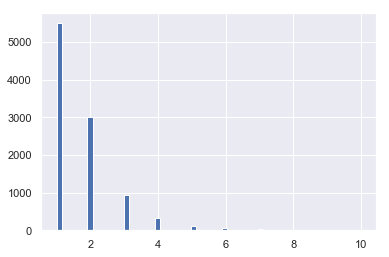

In [20]:
#Deposits
#https://stackoverflow.com/questions/37411633/how-to-generate-a-random-normal-distribution-of-integers
import scipy.stats as ss
x = np.arange(1, 60)
xU, xL = x + 0.1, x - 0.9
myScale = 1
myS = 0.7
prob = ss.lognorm.cdf(xU,s = myS,scale = myScale) - ss.lognorm.cdf(xL,s = myS, scale = myScale)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 10000, p = prob)
plt.hist(nums, bins = len(x))
a = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
for n in nums:
    a[n]+=1
print(a)


cid = 1    
data = ""
for n in nums:
    if(withProbabilityOf(0.005)):
        n = 0
    for i in range(0, n):
        authorisedWorkerId = random.randint(1, 100) #AccountCreatorId, the second number here is amount of workers (we pick one of their ids)
        currency = generate_currency()
        serviceId = generate_deposit_serviceId(currency)

        data += "EXEC Add_BankAccount '{}', '{}', '{}', '{}';".format(serviceId,generate_deposit_total(),cid,authorisedWorkerId) + "\n"
    cid += 1
    
print(data)
f = open("100Workers10kClients/DepositBankAccounts.sqql", "w")
f.write(data)
f.close()

[1 2 1 ... 1 1 1]
[0, 1112, 234, 15, 4, 0, 0, 0, 0, 0, 0]
EXEC Add_BankAccount '11', '68000.0', '15', '96';
EXEC Add_BankAccount '12', '2068000.0', '17', '75';
EXEC Add_BankAccount '11', '42000.0', '17', '1';
EXEC Add_BankAccount '17', '1000.0', '23', '49';
EXEC Add_BankAccount '12', '4010000.0', '24', '85';
EXEC Add_BankAccount '12', '2579000.0', '36', '31';
EXEC Add_BankAccount '15', '1000.0', '39', '54';
EXEC Add_BankAccount '11', '1000.0', '42', '26';
EXEC Add_BankAccount '11', '55000.0', '44', '5';
EXEC Add_BankAccount '11', '20000.0', '47', '78';
EXEC Add_BankAccount '11', '20000.0', '48', '25';
EXEC Add_BankAccount '11', '25000.0', '48', '8';
EXEC Add_BankAccount '11', '24000.0', '51', '44';
EXEC Add_BankAccount '12', '3069000.0', '52', '98';
EXEC Add_BankAccount '11', '37000.0', '56', '85';
EXEC Add_BankAccount '11', '79000.0', '63', '3';
EXEC Add_BankAccount '11', '28000.0', '66', '65';
EXEC Add_BankAccount '11', '12000.0', '75', '71';
EXEC Add_BankAccount '19', '2000.0', '88'

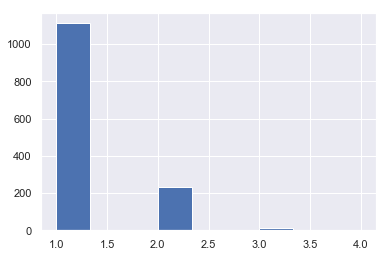

In [21]:
#Loans
#https://stackoverflow.com/questions/37411633/how-to-generate-a-random-normal-distribution-of-integers
import scipy.stats as ss
x = np.arange(1, 10)
xU, xL = x + 0.1, x - 0.9
myScale = 0.7
myS = 0.5
prob = ss.lognorm.cdf(xU,s = myS,scale = myScale) - ss.lognorm.cdf(xL,s = myS, scale = myScale)
prob = prob / prob.sum() #normalize the probabilities so their sum is 1
nums = np.random.choice(x, size = 1365, p = prob)
plt.hist(nums, bins = len(x))
print(nums)
a = [0,0,0,0,0,0,0,0,0,0,0]
for n in nums:
    a[n]+=1
print(a)

data = ""
csvlinenum = 1
for n in nums:
    cid = open("100Workers10kClients/temp.csv", "r").readlines()[csvlinenum]
    cid = cid.rstrip() 
    csvlinenum += 1
    #if(withProbabilityOf(0.01)):
        #n = 0
        #print("!" + cid)
    for i in range(0, n):
        authorisedWorkerId = random.randint(1, 100) #AccountCreatorId, the second number here is amount of workers (we pick one of their ids)
        currency = generate_currency()
        serviceId = generate_deposit_serviceId(currency) + 10

        data += ("EXEC Add_BankAccount '{}', '{}', '{}', '{}';".format(serviceId,generate_loan_total(serviceId, 50),cid,authorisedWorkerId) + "\n")
                
print(data)
f = open("100Workers10kClients/LoanBankAccounts2.sqsl", "w")
f.write(data)
f.close()